# Import Libraries

In [338]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carsforsale/cars_raw.csv


kullanılacak sütunlar:
- Year: Modelin yılı
- Make: araba'nın markası
- Model: arabanın modeli
- Used_New: ullanılıp kullanılmadığı
- Price(target): satıştaki fiyatı
- Consumer rating: arabaya gelen ortalama rate sayısı
- Consumer reviews: arbaaya gelen ortalama yorum sayısı
- seller type(categorik):dealer-private
- seller rating: satısıcının puanı
- seller review: satıcının aldığı yorumların ortalama
- deal type: satıcının pazarlığa olan davranışı
- ComfortRating	: arabanın rahatlığı
- InteriorDesignRating	: iç tasarımının değerlendirilmesi
- PerformanceRating: arabanın performansının değerlendirilmesi	
- ValueForMoneyRating	
- ExteriorStylingRating	
- ReliabilityRating
- drive train: araç hareketinin nasıl sağlandığı ile ilgili
- fuel type
- MinMPG	
- MaxMPG
- Engine
- transmission
- mileage

In [339]:
df= pd.read_csv("/kaggle/input/carsforsale/cars_raw.csv")

# EDA

In [340]:
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup and Home Delivery,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [342]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
212,2004,Toyota,Highlander Base,Used,"$5,995",4.5,47,Dealer,Northtown Auto Sales,4.9,2,8325 University Ave NE Minneapolis,MN,55432,Good,4.6,4.3,4.4,4.6,4.3,4.7,Tan,Tan,Front-wheel Drive,23,23,Gasoline,Automatic 5-Speed,3.3L V6,JTEGP21A740039991,40039991STK,204440
4930,2004,Toyota,Highlander Base,Used,"$5,995",4.5,47,Dealer,Northtown Auto Sales,4.9,2,8325 University Ave NE Minneapolis,MN,55432,Good,4.6,4.3,4.4,4.6,4.3,4.7,Tan,Tan,Front-wheel Drive,23,23,Gasoline,Automatic 5-Speed,3.3L V6,JTEGP21A740039991,40039991STK,204440
2607,2005,Acura,MDX Touring,Used,"$6,495",4.7,54,Dealer,JP Motors,4.3,7,7411 Centreville Rd Manassas,VA,20111,Good,4.8,4.5,4.6,4.8,4.6,4.9,Black,Ebony,Four-wheel Drive,17,23,Gasoline,5-Speed Automatic,3.5L V6 24V MPFI SOHC,2HNYD188X5H549256,2P771090,174916
7006,2005,Acura,MDX Touring,Used,"$6,495",4.7,54,Dealer,JP Motors,4.3,7,7411 Centreville Rd Manassas,VA,20111,Good,4.8,4.5,4.6,4.8,4.6,4.9,Black,Ebony,Four-wheel Drive,17,23,Gasoline,5-Speed Automatic,3.5L V6 24V MPFI SOHC,2HNYD188X5H549256,2P771090,174916
1716,2007,Toyota,Camry LE,Used,"$9,950",4.2,301,Dealer,TJK AUTO LLC,4.1,10,14227 S Street Omaha,NE,68137,Great,4.4,4.1,4.1,4.2,4.3,4.3,White,Tan,Front-wheel Drive,22,31,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,4T1BK46K87U548913,548913,99223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2022,Tesla,Model 3 Long Range,Used,"$66,237",4.8,2,Dealer,Napleton's Volkswagen of Sanford,4.6,795,4175 S. Orlando Sanford,FL,32773,Good,5.0,4.5,5.0,4.5,4.5,5.0,Midnight Silver Metallic,Black,All-wheel Drive,0,0,Electric,Automatic,Electric,5YJ3E1EB0NF119495,ZNF119495P,2224
1596,2022,Toyota,Highlander Hybrid Limited,Used,"$52,955",5.0,2,Dealer,AutoNation Toyota Hayward,4.4,1071,24773 Mission Blvd Hayward,CA,94544,Great,5.0,5.0,5.0,5.0,5.0,5.0,Ruby Flare Pearl,–,All-wheel Drive,35,34,Hybrid,Automatic CVT,2.5L I4 16V PDI DOHC Hybrid,5TDXBRCH7NS543753,NS543753,29994
4898,2022,Toyota,Highlander Hybrid Limited,Used,"$52,955",5.0,2,Dealer,AutoNation Toyota Hayward,4.4,1071,24773 Mission Blvd Hayward,CA,94544,Great,5.0,5.0,5.0,5.0,5.0,5.0,Ruby Flare Pearl,–,All-wheel Drive,35,34,Hybrid,Automatic CVT,2.5L I4 16V PDI DOHC Hybrid,5TDXBRCH7NS543753,NS543753,29994
3145,2022,Volvo,XC60 B5 Inscription,Used,"$48,500",2.7,1,Dealer,Volvo Cars Mall of Georgia,4.9,2106,3626 Buford Dr NE Buford,GA,30519,Good,5.0,5.0,1.0,1.0,5.0,1.0,Crystal White Metallic,Blonde,Front-wheel Drive,23,30,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,YV4L12DL6N1951540,LC422005B,18310


In [343]:
# Checks for duplicate observations in the data set and removes them

def duplicate_values(df):
    
    print("Duplicate check:")
    num_duplicates = df.duplicated(subset=None, keep='first').sum() #ilk görülen çift tutulur diğeri çift olarak işaretlenir
    
    if num_duplicates > 0:
        
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
        
    else:
        print("There are no duplicated observations in the dataset.")

In [344]:
duplicate_values(df)

Duplicate check:
There are 872 duplicated observations in the dataset.
872 duplicates were dropped!
No more duplicate rows!


In [345]:
df.describe().T

# If standard deviation is greater than or close to the mean, it gives us an inference that there is an outlier problem in our data.

# If there is a gap between the "min" and the first quartile of 25% and/or between the 3rd quartile of 75% and the "max", it provides an inference that there may be a limited number of outlier values in our data, but not in general.

,count,mean,std,min,25%,50%,75%,max
Year,8507.0,2018.731868,2.233527,2001.0,2018.0,2019.0,2020.0,2022.0
ConsumerRating,8507.0,4.702363,0.241391,2.5,4.7,4.8,4.8,5.0
ConsumerReviews,8507.0,132.381921,154.008707,1.0,30.0,75.0,182.0,817.0
SellerRating,8507.0,4.410568,0.628839,1.0,4.3,4.6,4.8,5.0
SellerReviews,8507.0,979.136241,1575.857525,1.0,112.0,541.0,1272.0,27824.0
ComfortRating,8507.0,4.770942,0.219724,3.0,4.7,4.8,4.9,5.0
InteriorDesignRating,8507.0,4.726296,0.195718,2.8,4.7,4.8,4.8,5.0
PerformanceRating,8507.0,4.696003,0.251411,1.0,4.6,4.7,4.8,5.0
ValueForMoneyRating,8507.0,4.536664,0.338451,1.0,4.5,4.6,4.7,5.0
ExteriorStylingRating,8507.0,4.781862,0.172481,3.0,4.7,4.8,4.9,5.0


In [346]:
df.select_dtypes(include ="object").head()


,Make,Model,Used/New,Price,SellerType,SellerName,StreetName,State,Zipcode,DealType,ExteriorColor,InteriorColor,Drivetrain,FuelType,Transmission,Engine,VIN,Stock#
0,Toyota,Sienna SE,Used,"$39,998",Dealer,CarMax Murrieta - Now offering Curbside Pickup and Home Delivery,25560 Madison Ave Murrieta,CA,92562,Great,Red,Black,Front-wheel Drive,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646
1,Ford,F-150 Lariat,Used,"$49,985",Dealer,Giant Chevrolet,1001 S Ben Maddox Way Visalia,CA,93292,Good,Shadow Black,Black,Four-wheel Drive,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A
2,RAM,1500 Laramie,Used,"$41,860",Dealer,Gill Auto Group Madera,1100 S Madera Ave Madera,CA,93637,Good,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G
3,Honda,Accord Sport SE,Used,"$28,500",Dealer,AutoSavvy Las Vegas,2121 E Sahara Ave Las Vegas,NV,89104,NaN,Gray,–,Front-wheel Drive,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237
4,Lexus,RX 350,Used,"$49,000",Dealer,Lexus of Henderson,7737 Eastgate Rd Henderson,NV,89011,Good,Eminent White Pearl,Birch,Front-wheel Drive,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A


In [347]:
# kategorik verilerde unique değerlere baktık
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())# col<20: çıktının daha okunabilri hale gelmesi için

Make                : 41
Model               : 1304
Used/New            : 26
Price               : 5064
SellerType          : 2
SellerName          : 3971
StreetName          : 3967
State               : 59
Zipcode             : 2163
DealType            : 3
ExteriorColor       : 949
InteriorColor       : 374
Drivetrain          : 10
FuelType            : 13
Transmission        : 93
Engine              : 326
VIN                 : 8474
Stock#              : 8431


## used-new sütunun kategorik verisi düzenlendi 2 kategoriye dönüştürüldü

In [348]:
# .... certified şeklinde olan ifadelerin hepsini markaya bakılmaksızın Certified'e dönüştürdüm
df["Used/New"] = df["Used/New"].str.replace(r'.*Certified.*', 'Certified', regex=True)


In [349]:
df["Used/New"].value_counts()

Used/New
Used         7182
Certified    1325
Name: count, dtype: int64

## Price sütunu 

In [350]:
df["Price"] = df["Price"].astype(str).str.strip("$")
df["Price"]= df["Price"].str.replace(',','.')


In [351]:
#Modelde .'yı kaldırarak sonuça bakacğaım
#df["Price"] = df["Price"].astype(str)
#df["Price"]= df["Price"].str.replace('.','')


In [352]:
#price sütununun dtype'ı dönüştürülmüyordu engel olan ifadeler bu şekildeymiş onları nan'a çevirip işlem yaparız
df[df["Price"].str.isdigit() == False]


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39.998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup and Home Delivery,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49.985,4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41.860,4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28.500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49.000,4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,2019,Honda,CR-V EX-L,Used,31.999,4.8,540,Dealer,Hoffman Honda,4.8,1917,40 Albany Tpke West Simsbury,CT,06092,Good,4.8,4.8,4.7,4.7,4.8,4.8,Obsidian Blue Pearl,–,All-wheel Drive,27,33,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,2HKRW2H87KH643043,10553HB,44481
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27.374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,443,657 Riverdale St. West Springfield,MA,01089,Good,4.7,4.7,4.6,4.7,4.8,4.8,Quartz Blue Pearl,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9376,2017,Buick,Enclave Leather,Used,26.944,4.8,137,Dealer,Tulley Automotive Group,4.7,831,147 Daniel Webster Hwy Nashua,NH,03060,Good,4.9,4.8,4.7,4.6,4.9,4.8,Ebony Twilight Metallic,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28.568,4.7,279,Dealer,Ira Subaru,4.4,680,97 Andover St Danvers,MA,01923,Good,4.8,4.7,4.6,4.7,4.7,4.8,Crystal Black Silica,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [353]:
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

df["Price"] = df["Price"].astype(float)


In [354]:
#1. yol
#Price sütununda 5 tane nan değer vardı, model ve alt-model'e göre priceların ortalamasını aldım ve onları doldurdum
avg_prices = df.groupby(["Make", "Model"])["Price"].mean().reset_index()
avg_prices.columns = ["Make", "Model", "avg_Price"]

df = pd.merge(df, avg_prices, on=["Make", "Model"], how="left")

df["Price"].fillna(df["avg_Price"], inplace=True)
df.drop(columns=["avg_Price"], inplace=True) 


In [355]:
#2. Yol
#Nan değerleri içeren sütunları düşürürüz
#df.dropna(subset=["Price"], inplace=True)


## Drivetrain sütunu

In [356]:
#drivetrain = Çekiş sistemi, bir aracın motor gücünün tekerleklere nasıl iletilip aracın hareketini nasıl sağladığını belirler. 
df["Drivetrain"].value_counts()

Drivetrain
All-wheel Drive      4014
Front-wheel Drive    2098
Four-wheel Drive     1441
Rear-wheel Drive      852
FWD                    35
AWD                    28
4WD                    19
RWD                    12
–                       7
Front Wheel Drive       1
Name: count, dtype: int64

In [357]:
df["Drivetrain"] = df["Drivetrain"].replace("–", np.nan)


In [358]:
#Model ve markaya göre drivetrain grupladık sonra burdan aldığımız değerlerle null değerleri doldurduk. mode değeri
drive_train_df = df.groupby(["Make", "Model"])["Drivetrain"].apply(lambda x: x.mode()[0] if x.mode().any() else None).reset_index()

df = pd.merge(df, drive_train_df, on=["Make", "Model"], suffixes=('', '_ref'), how='left')
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain_ref'])
df.drop("Drivetrain_ref", axis=1,inplace=True)

In [359]:
df[df["Drivetrain"].isna()==True]  #Tek bir tane null değerimiz(Porche 911 model) kalmış oluyor bunun null olmasının nedeni de bu modelden başka satışta olan araba bulunmaması. Drop ederiz

df.dropna(subset=["Drivetrain"], inplace=True)

In [360]:
df["Drivetrain"].value_counts() # çeşitlilik görüyoruz aslında toplam 4 unique değerimiz var kalanını bu çatı altında birleştirebiliriz

Drivetrain
All-wheel Drive      4017
Front-wheel Drive    2098
Four-wheel Drive     1444
Rear-wheel Drive      852
FWD                    35
AWD                    28
4WD                    19
RWD                    12
Front Wheel Drive       1
Name: count, dtype: int64

In [361]:
df["Drivetrain"] = df["Drivetrain"].astype(str)

df["Drivetrain"]=df["Drivetrain"].str.replace("All-wheel Drive", "AWD")
df["Drivetrain"]=df["Drivetrain"].str.replace("Front-wheel Drive", "FWD")
df["Drivetrain"]=df["Drivetrain"].str.replace("Front Wheel Drive", "FWD")
df["Drivetrain"]=df["Drivetrain"].str.replace("Four-wheel Drive", "4WD")
df["Drivetrain"]=df["Drivetrain"].str.replace("Rear-wheel Drive", "RWD")

In [362]:
df["Drivetrain"].value_counts() ## categorik değişkenlerimşz düzenlendi.

Drivetrain
AWD    4045
FWD    2134
4WD    1463
RWD     864
Name: count, dtype: int64

## DealType sütunu nanlar dolduruldu

In [363]:
df["DealType"].value_counts(dropna=False)

DealType
Good     5019
Great    2180
Fair     1102
NaN       205
Name: count, dtype: int64

In [364]:
df[df["DealType"].isna()==True]

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
3,2021,Honda,Accord Sport SE,Used,28.500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,FWD,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
14,2020,Dodge,Charger Scat Pack,Used,41.000,4.8,56,Dealer,AutoSavvy Gilbert,4.5,92,1025 north Arizona ave Gilbert,AZ,85233,NaN,4.9,4.8,4.9,4.7,4.9,4.9,Octane Red Pearlcoat,Black,RWD,15,24,Gasoline,8-Speed Automatic,6.4L V8 16V MPFI OHV,2C3CDXGJ4LH149735,54546,18717
17,2021,Subaru,Crosstrek Premium,Used,25.500,4.8,78,Dealer,AutoSavvy Lindon,4.4,121,370 State St Lindon,UT,84042,NaN,4.9,4.8,4.8,4.8,4.8,4.8,Cool-Gray Khaki,Black,AWD,28,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTAEC0M8340692,53341,11508
21,2021,Acura,RDX A-Spec,Used,37.000,4.8,42,Dealer,TJ Chapman Auto LLC,4.2,65,2021 N Redwood Rd Salt Lake City,UT,84116,NaN,4.9,4.9,4.7,4.6,4.9,4.8,Majestic Black Pearl,Red,AWD,21,26,Gasoline,10-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,5J8TC2H60ML034891,ML034891,5188
22,2021,Acura,RDX A-Spec,Used,38.000,4.8,42,Dealer,TJ Chapman Auto LLC,4.2,65,2021 N Redwood Rd Salt Lake City,UT,84116,NaN,4.9,4.9,4.7,4.6,4.9,4.8,Apex Blue Pearl,Red,AWD,21,26,Gasoline,10-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,5J8TC2H65ML044042,ML044042,12878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,2015,Audi,R8 5.2,Used,128.550,4.7,7,Dealer,McLaren Philadelphia,4.6,9,1631 W Chester Pike West Chester,PA,19382,NaN,4.4,4.6,4.9,4.6,5.0,5.0,Suzuka Gray Metallic/Black Roof,Black,AWD,13,22,Gasoline,7-Speed Automatic with Auto-Shift,5.2L V10 40V GDI DOHC,WUAVNAFG0F7001234,F7001234,23090
8066,2019,Audi,RS 5 2.9T,Used,69.995,4.8,11,Dealer,Boston Foreign Motor,4.8,609,521 Cambridge St Allston,MA,02134,NaN,4.6,4.7,4.8,4.5,5.0,4.9,Mythos Black Metallic,Black / Gray,AWD,17,26,Gasoline,8-Speed Automatic,2.9L V6 24V GDI DOHC Twin Turbo,WUABWCF52KA902192,5861A,18459
8279,2022,Hyundai,IONIQ 5 SE,Used,54.999,5.0,6,Dealer,Hyundai of Palatine,4.5,481,221 E Lake Cook Rd Palatine,IL,60074,NaN,5.0,5.0,4.7,5.0,5.0,5.0,Phantom Black,Gray,AWD,110,87,Electric,Automatic,Electric,KM8KMDAF7NU084241,D818,121
8310,2016,Mercedes-Benz,AMG GLE AMG GLE 63 S-Model 4MATIC,Used,39.888,4.5,8,Dealer,Auto Buying Service,4.7,148,2971 Prosperity Ave Fairfax,VA,22031,NaN,4.4,4.4,4.4,4.4,4.7,4.6,White,–,AWD,13,17,Gasoline,7-Speed Automatic,5.5L V8 32V GDI DOHC Twin Turbo,4JGDA7FB8GA657810,ABS2376,47565


### Eğer veri setindeki eksik değerleri en sık görülen değerlerle doldurursanız, bu işlem veri setinde sentetik veri oluşturma anlamına gelebilir. Sentetik veri, orijinal veri setinde doğrudan gözlemlenmemiş, ancak belirli bir kural veya model kullanılarak oluşturulmuş verilerdir.

In [365]:
deal_type_df = df.groupby("SellerName")["DealType"].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index() # x.mode()empty() eğer mode yoksa nan döndürür. .any kullanınca true-false'mu diye bakarız ama her zaman true false dönmez
df = df.merge(deal_type_df, on="SellerName", suffixes=('', '_ref'), how='left')
df['DealType'] = df['DealType'].fillna(df['DealType_ref'])

# Geçici sütunu kaldırma
df.drop(columns=['DealType_ref'], inplace=True)


DealType
Good     5578
Great    2438
Fair     1250
Name: count, dtype: int64
 duplicat veriden önceki hali

In [366]:
#filna işleminden sonra geriye 104 nan değer kaldı
df["DealType"].value_counts(dropna=False)

DealType
Good     5072
Great    2204
Fair     1126
None      104
Name: count, dtype: int64

In [367]:
#Gerie kalan nonlar enden doldurulmadı diye incelediimde satıcıların ya 1 tane satışları ya da eğer 1den çoksa hepsinin none olduğunu görüyoruz bu yüzden drop ederiz
df[df["DealType"].isna()==True]["SellerName"].value_counts()

SellerName
Prestige Imports Auto Sales                                      11
TJ Chapman Auto LLC                                               6
AutoSavvy Windsor                                                 3
Autolocity Motors                                                 3
Manhattan Motorcars Inc.                                          3
                                                                 ..
Porsche North Scottsdale                                          1
Graydon                                                           1
Park Avenue Autos                                                 1
Monaco Motor Group                                                1
Bentley, Maserati & Rolls-Royce Motor Cars by O'Gara Westlake     1
Name: count, Length: 77, dtype: int64

In [368]:
df.dropna(subset=["DealType"], inplace=True)

## FuelType

In [369]:
df["FuelType"].value_counts(dropna=False)

FuelType
Gasoline                         7980
Electric                          142
E85 Flex Fuel                     109
Hybrid                             63
Diesel                             41
–                                  29
Gasoline Fuel                      23
Gasoline/Mild Electric Hybrid       5
Electric Fuel System                4
Flex Fuel Capability                3
Flexible Fuel                       2
Diesel Fuel                         1
Name: count, dtype: int64

In [370]:
# burada da diğer satırlarda yaptığımız işlemin aynısını yapabiliriz. marka ve modele göre gruplayıp burdan fueltype mode'unu belirleyip boşlukları onunla doldurabiliriz
df[df["Model"] =="E-Class E 350"]

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
7,2014,Mercedes-Benz,E-Class E 350,Used,18.985,4.8,176,Dealer,Downtown Toyota-Subaru of Oakland,4.4,2695,4145 Broadway Oakland,CA,94611,Great,4.9,4.8,4.8,4.6,4.9,4.8,Lunar Blue Metallic,Saffron,RWD,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB3EA778099,224922A,58157
416,2014,Mercedes-Benz,E-Class E 350,Used,21.500,4.8,176,Private,IRVING,4.2,8,Warner Robins,GA,31088,Good,4.9,4.8,4.8,4.6,4.9,4.8,Gray,White,RWD,21,31,Gasoline Fuel,7-Speed A/T,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,WDDHF5KBXEB002305,–,66380
576,2014,Mercedes-Benz,E-Class E 350,Used,23.491,4.8,176,Dealer,Mercedes-Benz of Houston North,4.5,1343,17510 I-45 North Freeway Houston,TX,77090,Good,4.9,4.8,4.8,4.6,4.9,4.8,Palladium Silver Metallic,Sport,RWD,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB8EB011827,EB011827,56495
945,2014,Mercedes-Benz,E-Class E 350,Used,15.995,4.8,176,Dealer,R&T Expo,3.6,24,8905 Lipan Rd Houston,TX,77063,Great,4.9,4.8,4.8,4.6,4.9,4.8,Black,Black,RWD,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB2EB054110,054110,112877
1334,2014,Mercedes-Benz,E-Class E 350,Used,17.191,4.8,176,Dealer,Houston Direct Auto,4.2,909,1901 Little York Houston,TX,77093,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Gray,Black,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KB6EF227303,227303,104906
1962,2014,Mercedes-Benz,E-Class E 350,Used,29.975,4.8,176,Dealer,Imotobank,3.1,7,4-8 Industrial Rd Walpole,MA,02081,Fair,4.9,4.8,4.8,4.6,4.9,4.8,White,Tan,RWD,19,28,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKK5KF3EF265054,A80,46175
2199,2010,Mercedes-Benz,E-Class E 350,Used,16.991,4.7,115,Dealer,AutoQ Car & Truck Sales,5.0,98,107 Evening Way Mauldin,SC,29662,Good,4.7,4.7,4.7,4.5,4.9,4.7,Black,Beige,RWD,17,26,Gasoline,7-SPEED A/T,V6 Cylinder Engine,WDDKJ5GB3AF043729,043729,85810
2352,2014,Mercedes-Benz,E-Class E 350,Used,23.783,4.8,176,Dealer,AutoNation USA Katy,4.5,285,15625 Katy Fwy Houston,TX,77094,Good,4.9,4.8,4.8,4.6,4.9,4.8,Palladium Silver Metallic,–,RWD,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB5EA984962,EA984962,44750
2693,2014,Mercedes-Benz,E-Class E 350,Used,18.553,4.8,176,Dealer,Honda Cars of Rockwall,4.4,81,1550 I-30 Frontage Rd Rockwall,TX,75087,Great,4.9,4.8,4.8,4.6,4.9,4.8,Black,Black,RWD,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB0EB062125,EB062125A,88461
3189,2014,Mercedes-Benz,E-Class E 350,Used,29.998,4.8,176,Dealer,CarMax Texas Stadium (Irving) - Now offering Curbside Pickup and Home Delivery,3.4,12,3100 Spur 482 Irving,TX,75062,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Silver,Red,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KBXEF291456,23036133,34689


In [371]:
df[df["FuelType"]=="–"]

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
427,2020,Tesla,Model 3 Performance,Used,64.900,4.3,16,Dealer,Sanford INFINITI,4.9,1001,995 Rinehart Road Sanford,FL,32771,Good,4.6,4.4,4.6,4.0,4.2,4.4,Deep Blue Metallic,White / Black,AWD,118,107,–,1-Speed Automatic,Electric,5YJ3E1EC8LF669680,NP669680,11733
620,2020,Tesla,Model 3 Performance,Used,60.400,4.3,16,Dealer,Leonardtown Ford,4.6,135,26322 Point Lookout Rd Leonardtown,MD,20650,Good,4.6,4.4,4.6,4.0,4.2,4.4,Black,Black,AWD,118,107,–,1-Speed Automatic,0.0,5YJ3E1EC5LF602874,602874,46021
1334,2014,Mercedes-Benz,E-Class E 350,Used,17.191,4.8,176,Dealer,Houston Direct Auto,4.2,909,1901 Little York Houston,TX,77093,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Gray,Black,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KB6EF227303,227303,104906
1526,2021,Tesla,Model 3 Standard Range Plus,Used,56.472,3.0,1,Dealer,Federico Dodge Chrysler Jeep RAM,4.9,743,1875 E Edwardsville Rd Wood River,IL,62095,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EA2MF854002,10398,15595
1670,2021,Tesla,Model 3 Long Range,Used,61.921,3.0,1,Dealer,Antwerpen Chevrolet,5.0,5,6110 Sykesville Road Eldersburg,MD,21784,Good,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,AWD,141,127,–,1-Speed Automatic,0 0.0,5YJ3E1EB9MF979541,9045TC,19979
2381,2021,Tesla,Model 3 Standard Range Plus,Used,57.982,3.0,1,Dealer,Brandon Hyundai,4.3,5425,9915 East Adamo Drive Tampa,FL,33619,Great,3.0,4.0,5.0,2.0,4.0,1.0,Pearl White,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EAXMF017787,A226894A,13683
2444,2020,Tesla,Model 3 Long Range,Used,59.995,4.3,16,Dealer,Highline Auto Sales,4.6,327,555 Executive Dr Willowbrook,IL,60527,Great,4.6,4.4,4.6,4.0,4.2,4.4,Pearl White Multi,White / Black,AWD,124,116,–,1-Speed Automatic,–,5YJ3E1EB3LF525400,HL6224,15514
2578,2020,Tesla,Model 3 Performance,Used,67.995,4.3,16,Dealer,Marin Acura,4.9,1121,5860 Paradise Dr Corte Madera,CA,94925,Great,4.6,4.4,4.6,4.0,4.2,4.4,Black,Black,AWD,118,107,–,1-Speed Automatic,Electric,5YJ3E1EC2LF742011,21492,22761
3189,2014,Mercedes-Benz,E-Class E 350,Used,29.998,4.8,176,Dealer,CarMax Texas Stadium (Irving) - Now offering Curbside Pickup and Home Delivery,3.4,12,3100 Spur 482 Irving,TX,75062,Fair,4.9,4.8,4.8,4.6,4.9,4.8,Silver,Red,RWD,21,30,–,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDKJ5KBXEF291456,23036133,34689
3262,2021,Tesla,Model 3 Standard Range Plus,Used,53.500,3.0,1,Dealer,Yates Buick GMC,4.7,505,13845 W Test Dr Goodyear,AZ,85338,Great,3.0,4.0,5.0,2.0,4.0,1.0,Black,Black,RWD,150,133,–,1-Speed Automatic,Electric,5YJ3E1EA4MF867866,118184,16142


In [372]:
df["FuelType"]= df["FuelType"].replace("–",np.nan)
fuel_type_df = df.groupby(["Make", "Model"])["FuelType"].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index() # x.mode()empty() eğer mode yoksa nan döndürür. .any kullanınca true-false'mu diye bakarız ama her zaman true false dönmez
df = df.merge(fuel_type_df, on=["Make", "Model"], suffixes=('', '_ref'), how='left')
df['FuelType'] = df['FuelType'].fillna(df['FuelType_ref'])

# Geçici sütunu kaldırma
df.drop(columns=['FuelType_ref'], inplace=True)


In [373]:
df["FuelType"].value_counts(dropna=False)

FuelType
Gasoline                         7989
Electric                          158
E85 Flex Fuel                     109
Hybrid                             63
Diesel                             41
Gasoline Fuel                      23
Gasoline/Mild Electric Hybrid       5
Electric Fuel System                4
None                                4
Flex Fuel Capability                3
Flexible Fuel                       2
Diesel Fuel                         1
Name: count, dtype: int64

In [374]:
df[df["FuelType"].isna()==True] # burdaada son 4 veri nan kalmış onları droplarız
df.dropna(subset=['FuelType'], inplace=True)


In [375]:
df.head(1)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39.998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup and Home Delivery,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,FWD,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403


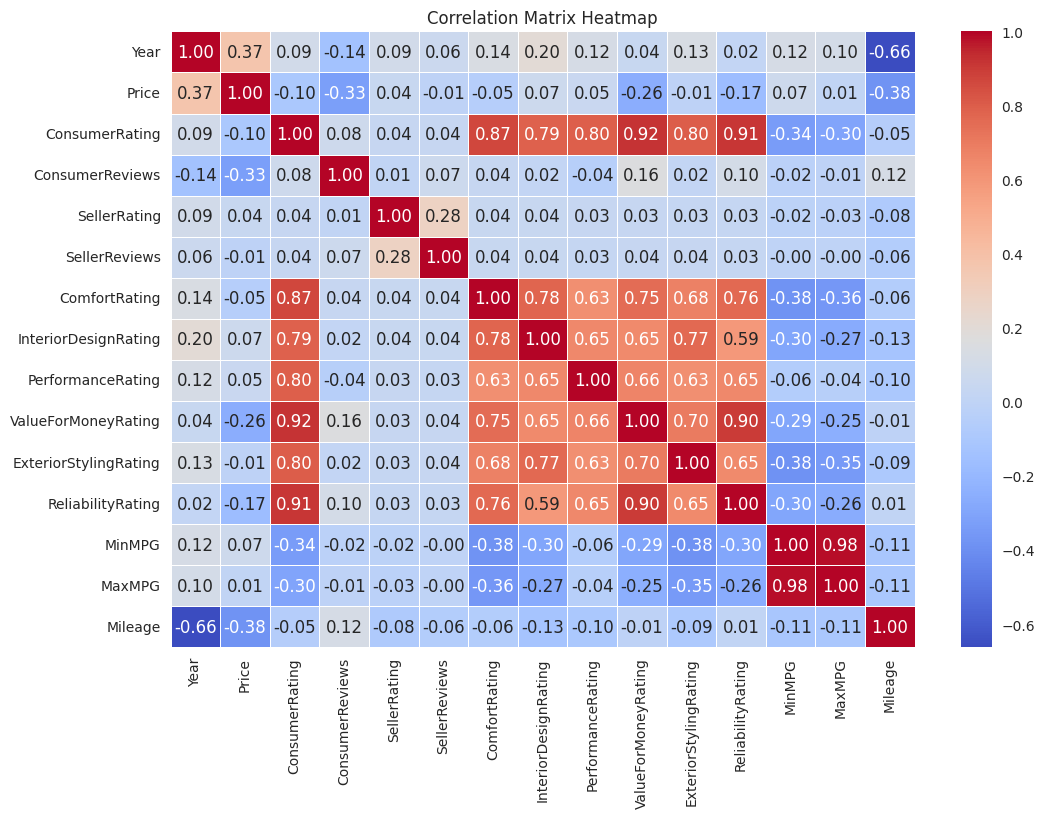

In [376]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


MinMPG: Şehir içi yakıt verimliliğini belirtir. Daha düşük değerler gösterir.
MaxMPG: Şehir dışı yakıt verimliliğini belirtir. Daha yüksek değerler gösterir.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make')
plt.title(f'Distribution of Brand of Car')
plt.xticks(rotation=90)
plt.show()


In [377]:
value_counts = df['Make'].value_counts()

# Değer sayısı 2'den küçük olan indeksleri alalım
to_drop = value_counts[value_counts < 2].index

# to_drop listesindeki indekslere sahip satırları düşürür
df = df[~df['Make'].isin(to_drop)]

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Drivetrain')
plt.title(f'Distribution of Used/New')
plt.xticks(rotation=90)
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(30, 25))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Box Plots of All Numeric Columns')
plt.show()


In [ ]:
#outlie durumöarını gözlemlediimizde Sellerreviews'de daha açık görüyoruz
numeric_cols = df.select_dtypes(include=['number']).columns

# Her bir sayısal sütun için box plot oluşturma
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [378]:
df[df["SellerReviews"]>15000]  # 8 tane değer var. burda drop işlemi yapabiliriz outlier değerler için

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
596,2020,BMW,X3 M40i,Used,49.999,4.9,51,Dealer,Off Lease Only Palm Beach,4.9,27351,1200 S Congress Ave West Palm Beach,FL,33406,Good,5.0,4.9,4.9,4.7,4.9,4.9,Black Sapphire Metallic,Cognac,AWD,21,27,Gasoline,8-Speed Automatic,3.0L I6 24V GDI DOHC Turbo,5UXTY9C06L9B58334,C366396,32204
789,2020,BMW,X3 M40i,Used,51.995,4.9,51,Dealer,Off Lease Only Palm Beach,4.9,27351,1200 S Congress Ave West Palm Beach,FL,33406,Fair,5.0,4.9,4.9,4.7,4.9,4.9,Glacier Silver Metallic,Canberra Beige,AWD,21,27,Gasoline,8-Speed Automatic,3.0L I6 24V GDI DOHC Turbo,5UXTY9C09LLE60218,T355872,21810
2591,2019,Mazda,CX-9 Grand Touring,Used,33.499,5.0,52,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,5.0,4.9,4.9,5.0,5.0,4.9,Deep Crystal Blue Mica,Black,FWD,22,28,Gasoline,6-Speed Automatic,2.5L I4 16V GDI DOHC Turbo,JM3TCADY5K0312593,P364004B,32564
3602,2017,GMC,Sierra 1500 Denali,Used,43.499,4.6,187,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,4.8,4.7,4.6,4.4,4.8,4.6,Onyx Black,Jet Black,4WD,15,21,Gasoline,8-Speed Automatic,6.2L V8 16V GDI OHV,3GTU2PEJXHG442359,O365276,39135
4157,2014,Hyundai,Elantra SE,Used,13.999,4.5,132,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Fair,4.5,4.6,4.4,4.5,4.7,4.5,Venetian Red,Gray,FWD,28,38,Gasoline,6-Speed Automatic,1.8L I4 16V MPFI DOHC,5NPDH4AE3EH470559,O366426A,67737
4390,2019,Honda,Passport EX-L,Used,34.399,4.7,102,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Good,4.8,4.7,4.7,4.6,4.7,4.8,Modern Steel Metallic,Black,AWD,19,24,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF8H59KB020302,O367745,32634
7774,2019,Mazda,CX-9 Touring,Used,31.399,5.0,52,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,5.0,4.9,4.9,5.0,5.0,4.9,Machine Gray Metallic,Sand,FWD,22,28,Gasoline,6-Speed Automatic,2.5L I4 16V GDI DOHC Turbo,JM3TCACY5K0316161,O367538,15508
7775,2017,GMC,Sierra 1500 Denali,Used,40.995,4.6,187,Dealer,Off Lease Only Orlando,4.9,27824,8443 McCoy Road Orlando,FL,32822,Great,4.8,4.7,4.6,4.4,4.8,4.6,Quicksilver Metallic,Jet Black,4WD,15,21,Gasoline,8-Speed Automatic,6.2L V8 16V GDI OHV,3GTU2PEJXHG476267,P359710A,53078


In [379]:
value_counts = df['SellerReviews'].value_counts()

to_drop = value_counts[value_counts < 2].index

# to_drop listesindeki indekslere sahip satırları düşürür
df = df[~df['SellerReviews'].isin(to_drop)]

In [380]:
df[df["MinMPG"] == 0]

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
38,2017,Tesla,Model S 75,Used,47.000,4.6,37,Private,Kenny,4.2,380,Gallatin,TN,37066,Good,4.7,4.4,4.9,4.1,4.7,4.5,Silver,White,RWD,0,0,Electric Fuel System,A/T,382.0HP Electric Motor Electric Fuel System,5YJSA1E17HF196111,–,84000
227,2011,Ford,F-150 Lariat,Used,19.995,4.5,262,Dealer,Auto Trademark,3.8,159,7591 Centreville Rd Manassas,VA,20111,Good,4.7,4.5,4.5,4.4,4.6,4.5,Black,Pale Adobe,4WD,0,0,E85 Flex Fuel,Automatic,5.0L V8 FFV engine,1FTFW1EF0BFA47010,AT15199,141281
500,2020,Tesla,Model 3 Performance,Used,61.230,4.3,16,Dealer,Napleton's Volkswagen of Sanford,4.6,795,4175 S. Orlando Sanford,FL,32773,Great,4.6,4.4,4.6,4.0,4.2,4.4,White,Black,AWD,0,0,Electric,Automatic,Electric,5YJ3E1ECXLF623994,ZLF623994P,45304
876,2021,Tesla,Model 3 Long Range,Used,58.000,3.0,1,Private,Will,4.6,283,New York,NY,10011,Great,3.0,4.0,5.0,2.0,4.0,1.0,Red,White,AWD,0,0,Electric Fuel System,A/T,Electric Motor Electric Fuel System,5YJ3E1EB6MF020047,–,7900
1019,2021,Tesla,Model 3 Performance,Used,68.000,3.0,1,Private,John,2.5,3,Minneapolis,MN,55436,Great,3.0,4.0,5.0,2.0,4.0,1.0,Gray,Black,AWD,0,0,Electric Fuel System,A/T,Electric Motor Electric Fuel System,5YJ3E1EC6MF850083,–,12500
1316,2008,Chevrolet,Silverado 2500 LTZ H/D Crew Cab,Used,25.000,4.5,28,Private,Ryan,4.9,4171,Lancaster,KY,40444,Great,4.4,4.4,4.6,4.5,4.5,4.6,Black,Beige,4WD,0,0,Diesel Fuel,6-Speed A/T,365.0HP 6.6L 8 Cylinder Engine Diesel Fuel,1GCHK23678F138958,–,226000
2338,2021,Tesla,Model Y Performance,Used,76.518,4.0,15,Dealer,Napleton's Volkswagen of Sanford,4.6,795,4175 S. Orlando Sanford,FL,32773,Great,4.1,4.2,4.3,3.7,4.2,3.8,White,Black,AWD,0,0,Electric,Automatic,Electric,5YJYGDEF6MF178523,ZMF178523P,15717
2482,2019,Mercedes-Benz,GLC 350e Base 4MATIC,Used,39.990,4.2,11,Dealer,City Auto,4.7,152,1023 Bridge Ave Murfreesboro,TN,37129,Good,4.7,4.5,4.1,3.6,4.5,3.9,WHITE,Black,AWD,0,0,Gasoline,7-SPEED A/T,4 Cylinder Engine,WDC0G5EBXKF636924,396743_21005-F,49775
2635,2020,GMC,Sierra 2500 Denali,Used,77.980,4.8,23,Dealer,Covert Ford,4.5,877,11514 Research Blvd Austin,TX,78759,Fair,4.9,4.9,4.8,4.5,4.9,4.7,Quicksilver Metallic,Jet Black,4WD,0,0,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,1GT49REY5LF199090,2225587A,45998
3593,2019,Buick,Enclave Essence,Used,36.500,4.6,63,Dealer,Ed Rinke Chevrolet-Buick-GMC Co.,3.9,155,26125 Van Dyke Center Line,MI,48015,Good,4.7,4.7,4.5,4.4,4.7,4.6,Ebony Twilight Metallic,Dark Galvanized,FWD,0,0,Gasoline,9-SPEED A/T,V6 Cylinder Engine,5GAERBKW9KJ139518,58053,13394


In [381]:
#min ve maxmpg 0 olan değerleri düşürmemiz gereklidir. çünkü yanlış veri girişi yapılmış 
to_drop = df[(df["MinMPG"] == 0) & (df["MaxMPG"] == 0)].index

df.drop(index=to_drop, inplace=True)


In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Make", y="Price", data=df, whis=3, color="royalblue")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

In [382]:
df.drop(["Model", "SellerName", "StreetName", "State", "ExteriorColor", "InteriorColor", "Engine", "VIN", "Stock#"], axis=1, inplace=True)

In [383]:
df = df.join(df["Drivetrain"].str.get_dummies().add_prefix("dt_"))
df = df.join(df["DealType"].str.get_dummies().add_prefix("deal_"))
df = df.join(df["FuelType"].str.get_dummies().add_prefix("dt_"))
df = df.join(df["Make"].str.get_dummies().add_prefix("mk_")) #make'i encode yapıcaz ya da drop


In [384]:
df.drop(["DealType", "Drivetrain", "FuelType","Zipcode","Make","Transmission"], axis=1, inplace=True)

In [385]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Used/New', 'SellerType']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

df

,Year,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage,dt_4WD,dt_AWD,dt_FWD,dt_RWD,deal_Fair,deal_Good,deal_Great,dt_Diesel,dt_E85 Flex Fuel,dt_Electric,dt_Flex Fuel Capability,dt_Flexible Fuel,dt_Gasoline,dt_Gasoline Fuel,dt_Gasoline/Mild Electric Hybrid,dt_Hybrid,mk_Acura,mk_Alfa,mk_Audi,mk_BMW,mk_Bentley,mk_Buick,mk_Cadillac,mk_Chevrolet,mk_Chrysler,mk_Dodge,mk_Ford,mk_GMC,mk_Genesis,mk_Honda,mk_Hyundai,mk_INFINITI,mk_Jaguar,mk_Jeep,mk_Kia,mk_Lamborghini,mk_Land,mk_Lexus,mk_Lincoln,mk_MINI,mk_Maserati,mk_Mazda,mk_Mercedes-Benz,mk_Mercury,mk_Mitsubishi,mk_Nissan,mk_Porsche,mk_RAM,mk_Scion,mk_Subaru,mk_Tesla,mk_Toyota,mk_Volkswagen,mk_Volvo
0,2019,1,39.998,4.6,45,0,3.3,3,4.7,4.6,4.6,4.4,4.6,4.7,19,27,29403,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2018,1,49.985,4.8,817,0,4.8,131,4.9,4.8,4.8,4.6,4.8,4.7,19,24,32929,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,41.860,4.7,495,0,4.6,249,4.8,4.7,4.8,4.6,4.8,4.7,15,21,23173,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2012,1,23.541,4.7,34,0,4.4,1071,4.7,4.6,4.4,4.6,4.9,4.9,17,23,105469,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,2017,1,20.995,4.6,200,0,4.4,2695,4.6,4.4,4.4,4.5,4.7,4.8,28,34,10458,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,2019,1,33.277,4.8,540,0,4.7,4705,4.8,4.8,4.7,4.7,4.8,4.8,27,33,18025,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8397,2019,1,31.999,4.8,540,0,4.8,1917,4.8,4.8,4.7,4.7,4.8,4.8,27,33,44481,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8398,2019,1,27.374,4.7,205,0,4.4,443,4.7,4.7,4.6,4.7,4.8,4.8,27,33,15606,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8399,2017,1,26.944,4.8,137,0,4.7,831,4.9,4.8,4.7,4.6,4.9,4.8,15,22,62649,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [386]:
df.isnull().any().any()


False

In [387]:
corr_by_price = df.corr()["Price"].sort_values()[:-1]
corr_by_price

Mileage               -0.382064
ConsumerReviews       -0.325700
dt_FWD                -0.325149
ValueForMoneyRating   -0.258264
ReliabilityRating     -0.175203
                         ...   
dt_Electric            0.195743
mk_Tesla               0.205078
mk_Porsche             0.220045
mk_Lamborghini         0.320758
Year                   0.368895
Name: Price, Length: 70, dtype: float64

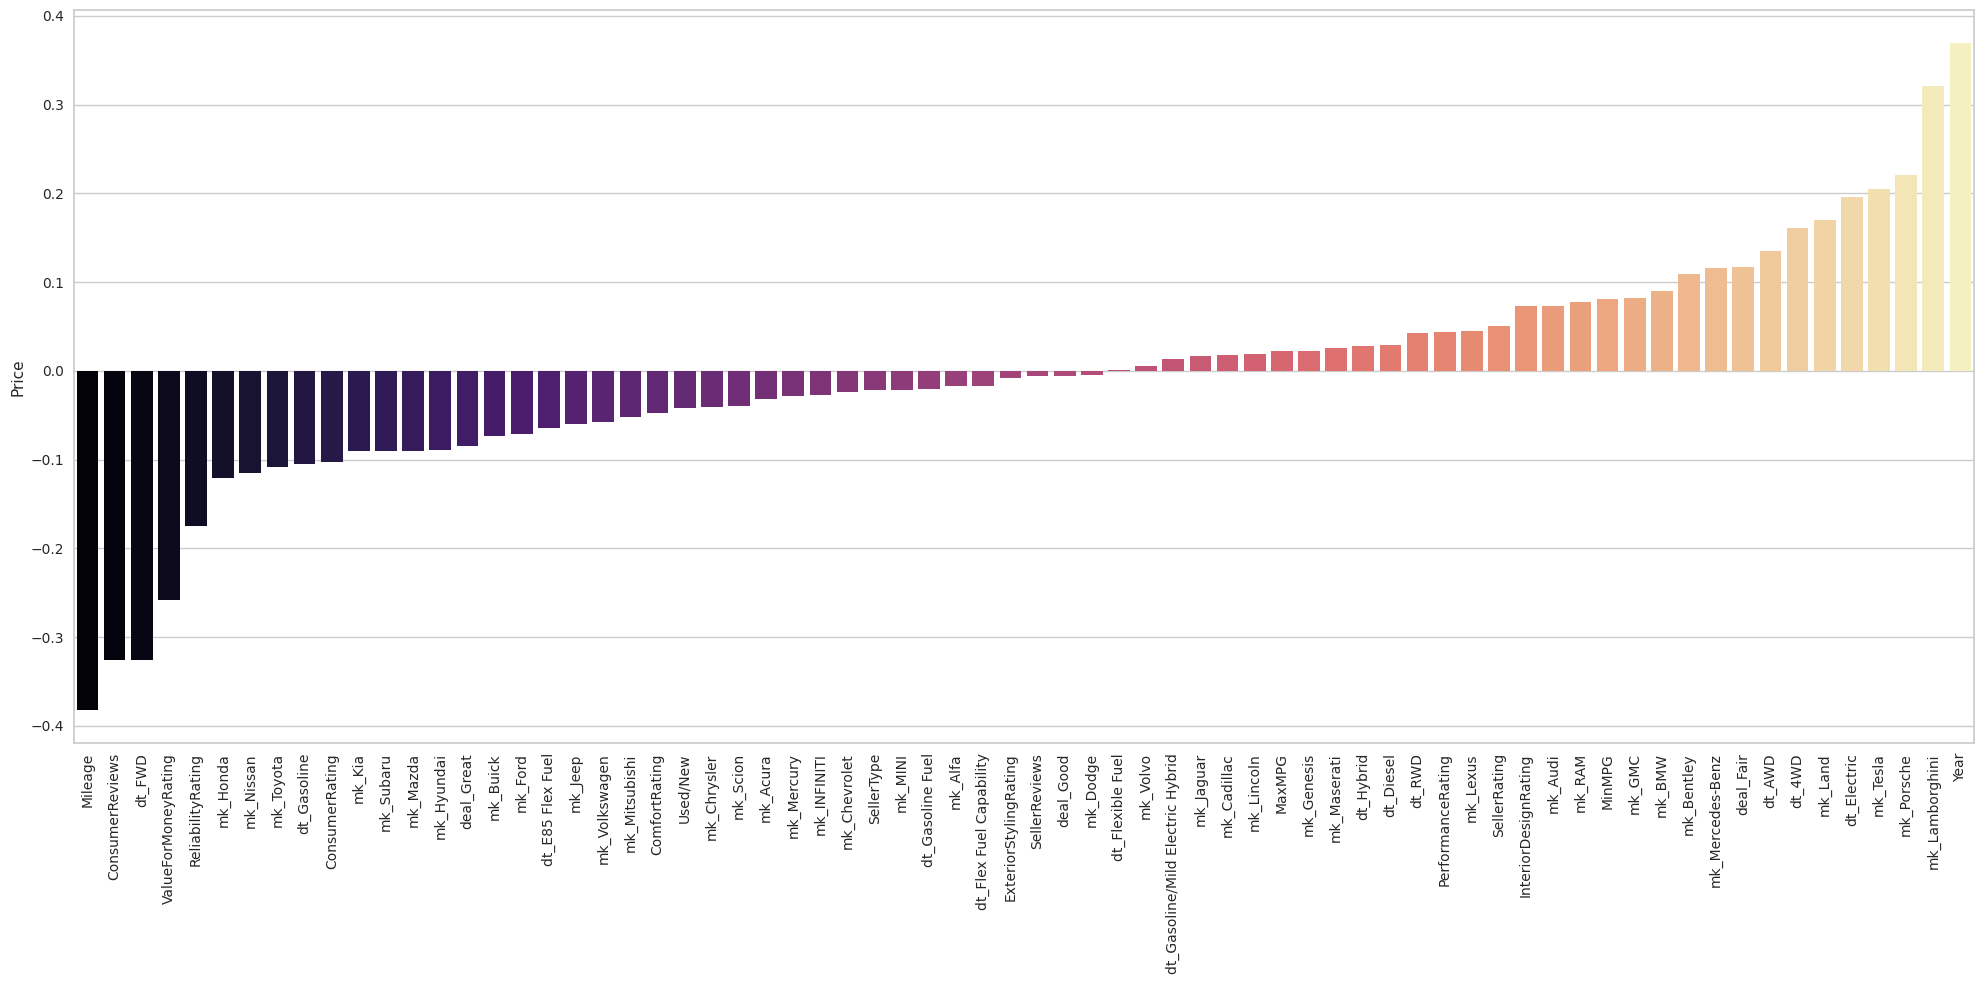

In [388]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price, palette="magma")
plt.xticks(rotation=90)
plt.tight_layout();


# PyCaret

# Train - Test

In [ ]:
X= df.drop(columns="Price")
y= df.Price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Model

In [ ]:
#metriclerden gelen sonuçlarla datanın predictlere bir göz atıyoruz
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [ ]:
from sklearn.linear_model import LinearRegression # LinearRegression algortimasını import ediyoruz.

lm = LinearRegression()
lm.fit(X_train,y_train)
train_val(lm, X_train, y_train, X_test, y_test)


## Adjusted R2 skore


In [ ]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2


In [ ]:
y_pred = lm.predict(X_test)
adj_r2(y_test, y_pred, df)  # R2 skorumuzla aynı çıktı demekki çok sıkıntı yok. ama bunu yapmayı bırakmamak lazım

# CV

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [ ]:
pd.DataFrame(scores)


In [ ]:
pd.DataFrame(scores).iloc[:, 2:].mean()


In [ ]:
train_val(lm, X_train, y_train, X_test, y_test)


In [ ]:
9.669015/df.Price.mean()  #%24'lük bir hata yapmış olduk

# hataya ortalamalardan baktığımız için tahmin etmek istediğimiz değerin ortalamasını alıp 
# hataların ortalamasını (error metriklerin ortalaması) tahmin etmek istediğimiz değerin ortalamasına böleceğiz

# iki ortalama değerin birbirine oranı ne kadar hata yaptğımızı gösterecek
# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre
# modelimiz ortalama %13.9 hata yapıyor.

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz


In [ ]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();
#Ortadaki çizgi mükemmel olandır. ama. bu iki çizgiyi birbirne yakınlaştırmaktır.
#burdan outlier tespiti de yaparız ve görürüz hataya sebep var mı diye

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()


In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [ ]:
df["Price"] 

In [ ]:
df[df["Price"]>100.000]

In [ ]:
df1 = df[~(df.Price>100.000)]
df1.head()

# fiyatı 100.000'den büyük olmayan satırları (gözlemleri) filtrelemek için
# Tilde (~) operatörü, mantıksal bir değerin tersini almak için kullanılır. 

In [ ]:
len(df[df.Price>100.000])


In [ ]:
X = df1.drop(columns = "Price")
y = df1.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

In [ ]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
#Bu daha iyi bir sonuç verir bize
df2 = df[~(df.Price>80.000)]
X = df2.drop(columns = "Price")
y = df2.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train,y_train)

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [ ]:
train_val(lm3, X_train, y_train, X_test, y_test)


In [ ]:
6.955348/df2.Price.mean()  #yeniden ortalama hata oranımıza bakalım
#%24'ten %18'e düştü

In [ ]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [ ]:
comp_sample = compare.sample(20)
comp_sample

In [ ]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [ ]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")


# Pipeline

daha temiz bir kod yapısı için ve hata yapma riskini en aza indirmek için kullanılır

In [ ]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]  #seçilen ölçeklendirme verinin yapısına göre değişiklik göstermektedir 


In [ ]:
pipe_model = Pipeline(steps=operations)


In [ ]:
pipe_model.fit(X_train, y_train)
 
# fit metodunu kullanarak, veri dönüştürme adımlarını ve modeli eğitiyoruz. 
# Bu, önce verimizi MinMaxScaler ile ölçeklendirir ve ardından ölçeklendirilmiş veri üzerinde LinearRegression modelini eğitir.
# bu sayede hiçbir adımı gözden kaçırmayız

In [ ]:
train_val(pipe_model, X_train, y_train, X_test, y_test)


# Regularization

- overfitinge dayanıklılık sağlar(ana amaç)
- performansı her zaman arttırmaya bilir
- feature selection yapmamızı sağlar ve bu sayede multicolinerty azaltır (Lasso regresyonu, bazı katsayıları tamamen sıfıra indirerek etkisiz feature ları modelden çıkarabilir.)

## Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)  # Data Leakage önlemek için sadece train veri setine uygulanır test'e uygulamamaya dikkat etmemiz lazım

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridge_model = Ridge(alpha=1, random_state=42) #default alpha=1 alpha=regülarizasyon kuvveti
ridge_model.fit(X_train_scaled, y_train)

# alpha reg. hyper parametresidir. Bu deger büyüdükçe uygulanan reg. kuvveti artar. overfitingi yenmek için bu hyper parameter artırılmalıdı

In [ ]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)


## best alpha

- hyperparametreler oynadığımız değerlerdir bize bağlıdır- değiştirebilriiz. 

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

In [ ]:
ridge_model = Ridge(random_state=42) 

param_grid = {"alpha":alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error', #model için önemli olan tek bir skor yazarız. dengesiz veri setinde accuracy kullanmak yanlıştır
                          cv=10,
                          n_jobs = -1)  #sadece gridsearch'i çalıştır arka planda çalışanları durdur.
ridge_grid_model.fit(X_train_scaled,y_train) 


In [ ]:
ridge_grid_model.best_params_
#yapılan eğitim sonucu en iyi 0.01 bulmuştur

In [ ]:
ridge_grid_model.best_estimator_


In [ ]:
pd.DataFrame(ridge_grid_model.cv_results_)


In [ ]:
ridge_grid_model.best_index_


In [ ]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)


In [ ]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

## 